# Perceptron

**Model Overview**

A perceptron is a single-layer neural network that takes several binary inputs, applies weights to them, sums them up, and passes the sum through an activation function to produce an output.
Architecture: It consists of input nodes (receiving data), weights (assigned to each input), a summation function (summing the weighted inputs), and an activation function (determining the output based on the sum).
Learning Process: The perceptron learns by adjusting the weights assigned to each input during the training process. It uses a learning algorithm (like the perceptron learning rule) to update the weights based on the errors in the predictions.

**Building the Perceptron**

The notebook aims to create a perceptron model from scratch using the IBM Employee Attrition dataset. Building it from scratch involves defining the structure of the perceptron, including the number of inputs, weights, bias, and activation function. Then, the perceptron is trained using the dataset to learn and make predictions based on the input features.

In [1]:
# Essential imports
import numpy as np  # Linear algebra functions
import pandas as pd  # Data processing from CSV
import random

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics

# Loading dataset as a dataframe
df = pd.read_csv("/content/sample_data/IBMEmployeeAttrition.csv")


## Building the Perceptron

In [2]:
# Perceptron class for binary classification
class Perceptron():
    # Initialize Perceptron attributes
    def __init__(self) -> None:
        self.X = None  # Features
        self.variables = None  # Column names
        self.y = None  # Target variable
        self.predictor = None  # Name of target variable
        self.n = None  # Number of samples
        self.p = None  # Number of features
        self.bias = None  # Bias term inclusion
        self.gamma = None  # Learning rate
        self.max_iter = None  # Maximum iterations for convergence
        self.eta = None  # Adjustment factor

        self.weights = None  # Model weights
        self.weights_history = []  # Weight history during training
        self.loss_history = [np.inf]  # Loss history during training

    # Sign function for activation
    def sign(self, x, y):
        if x @ y > 0:
            return 1
        else:
            return -1

    # Loss function for the perceptron
    def loss(self):
        return sum(0.5 * (self.sign(self.weights, x) - self.y[i])**2 for i, x in enumerate(self.X))

    # Approximated gradient for updating weights
    def grad_approx(self, x, y):
        return (self.sign(self.weights, x) - y) * x

    # Update weights based on gradient descent
    def update_w(self, id):
        self.weights = self.weights - self.gamma * self.grad_approx(self.X[id], self.y[id])
        self.weights_history.append(self.weights)
        return

    # Fitting the Perceptron model
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name

        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta

        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)

        for i in range(1, max_iter+1):
            random_id = np.random.randint(self.n)
            weights = self.update_w(random_id)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter:
                break

    # Prediction on new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        y_hat = [self.sign(x, weights) for x in X]
        return y_hat


# Preprocessing

 Preprocessing the dataset is a crucial step to ensure the data is in a suitable format for the perceptron model. In this phase, utilizing the sklearn preprocessing package, we aim to prepare the dataset by handling any issues such as variables with zero variance, which could impede the learning process or negatively impact model performance. Removing variables with zero variance helps in reducing noise and redundant information, optimizing the dataset's efficiency for the perceptron. This step is essential to enhance the model's learning ability and ensure the effectiveness of the subsequent training process.

In [3]:
# Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop('EmployeeCount', axis=1, inplace=True)  # Remove the 'EmployeeCount' column
df.drop('Over18', axis=1, inplace=True)  # Remove the 'Over18' column
df.drop('StandardHours', axis=1, inplace=True)  # Remove the 'StandardHours' column

# Replacing Yes/No in the target variable (Attrition) with 1/0
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})  # Encode 'No' as 0 and 'Yes' as 1 in the 'Attrition' column


In [4]:
# Create a function to preprocess categorical columns using LabelEncoder
def preprocessor(df):
    # Create a copy of the input DataFrame
    res_df = df.copy()
    # Initialize LabelEncoder
    le = preprocessing.LabelEncoder()

    # Encode categorical columns using LabelEncoder
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])

    return res_df

# Apply the preprocessor function to the dataset
encoded_df = preprocessor(df)


In [5]:
#Selecting features
X = encoded_df.drop(['Attrition'],axis =1)
y = encoded_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [6]:
#Standardizing features
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


Text(0, 0.5, 'Monthly Income')

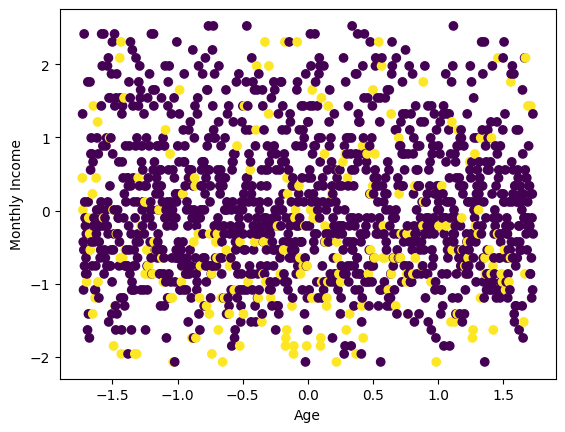

In [7]:
plt.scatter(X.iloc[:, 0], X.iloc[:,1], c=y)
plt.xlabel('Age')
plt.ylabel('Monthly Income')

In [8]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=40)


In [9]:
# Instantiate the Perceptron model
model = Perceptron()

# Fit the model using training data
model.fit(X_train, y_train, gamma=0.001, max_iter=1000)


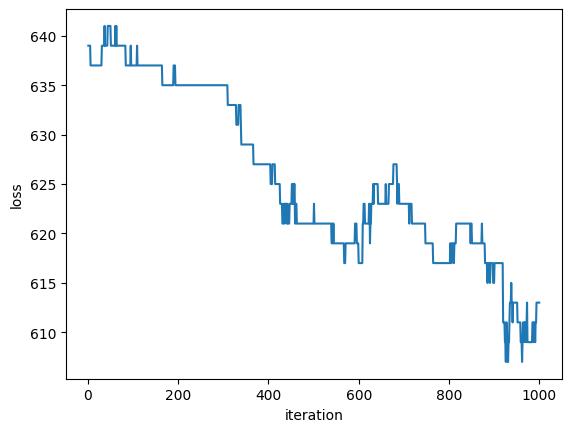

In [10]:
#Loss history during training
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

## Performance Analysis

After training the Perceptron, the subsequent phase involves evaluating its performance. This assessment includes the examination of the confusion matrix, a matrix illustrating the model's predictions against actual values, and the Receiver Operating Characteristic (ROC) curve. These evaluations help gauge the model's accuracy, highlighting its strengths and potential areas for improvement.

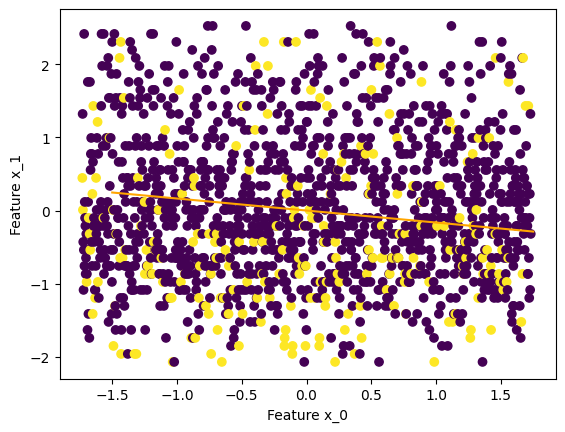

In [11]:
# Scatter plot of features colored by target variable
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)

# Generating the decision boundary line using model weights
domain = np.arange(-1.5, 2, 0.25)
w = model.weights
line = [-(w[1:2] * x) / w[0] for x in domain]

# Plotting the decision boundary line
plt.plot(domain, line, label='separator', color='orange')
plt.xlabel('Feature x_0')
plt.ylabel('Feature x_1')
plt.show()


In [12]:
# Predicting and evaluating the model accuracy on the training set
y_pred = model.prediction(X_train, model.weights)
print(f'Training accuracy score = {accuracy_score(y_train, y_pred)}')

# Predicting and evaluating the model accuracy on the test set
y_pred_test = model.prediction(X_test, model.weights)
print(f'Test accuracy score = {accuracy_score(y_test, y_pred_test)}')


Training accuracy score = 0.09437386569872959
Test accuracy score = 0.07608695652173914


Text(0.5, 427.9555555555555, 'Predicted label')

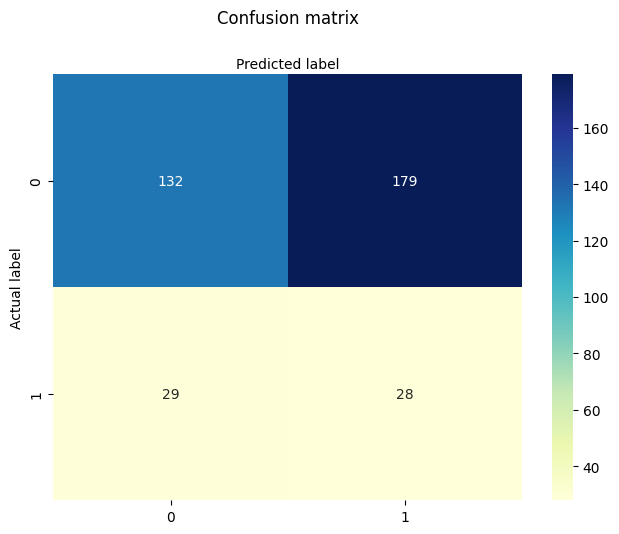

In [13]:
# Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
class_names = [0, 1]  # Name of classes

# The confusion matrix was coming out with a "T" in the middle of the data, so the lines below fix the formatting
cnf_matrix = np.delete(cnf_matrix, 0, 0)  # Delete the first row of the confusion matrix
cnf_matrix = np.delete(cnf_matrix, 1, 1)  # Delete the middle column of the confusion matrix

# Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [14]:
# Print a nicely formatted report
classify_perceptron = classification_report(y_test, y_pred_test)
print("\nClassification Report:")
print(classify_perceptron)



Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       311
           1       0.14      0.49      0.21        57

    accuracy                           0.08       368
   macro avg       0.05      0.16      0.07       368
weighted avg       0.02      0.08      0.03       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

The Perceptron Learning Algorithm functions best when it can draw a linear boundary between classes in the dataset. In cases where the data isn't linearly separable, like the IBMEmployeeAttrition dataset, its accuracy diminishes. However, its strength lies in its simplicity and efficiency, making it suitable for smaller datasets where classes are linearly separable. Due to its low computational demand, the Perceptron remains a valuable choice for swift, straightforward classification tasks with easily separable data patterns.





